# 训练

# 训练机器
- 圣保罗 1_1 WIN
- 圣保罗 1_2 WIN
- 圣保罗 2_1 WIN
- 圣保罗 2_2 WIN

---
- 首尔1 WIN
- 首尔2 WIN
- 首尔 ARM 2C record
- 首尔 ARM 2C

---
- 腾讯云 WIN
- 圣保罗1 ARM 1C
- 圣保罗1 ARM 2C
- PC





In [1]:
# # 训练检查

# - dl_helper是否推送
# - idx=0 测试，等待alist出现成果
# - 检查各账号可用时长
# - 全部启动

In [ ]:
# 资料转移
# 准备环境
!wget https://raw.githubusercontent.com/lhiqwj173/dl_helper/master/envs/transfer.py > /dev/null 2>&1
!python transfer.py > /dev/null 2>&1

import os
os.environ['ALIST_USER'] = 'admin'
os.environ['ALIST_PWD'] = 'LHss6632673'

!wget -O run.py https://raw.githubusercontent.com/lhiqwj173/dl_helper/master/dl_helper/Transfer_alist_to_kaggle.py > /dev/null 2>&1
!python run.py only_transfer

In [ ]:
# 运行训练
# 准备环境
!wget https://raw.githubusercontent.com/lhiqwj173/dl_helper/master/envs/dl.py > /dev/null 2>&1
!python dl.py > /dev/null 2>&1

import os
os.environ['ALIST_USER'] = 'admin'
os.environ['ALIST_PWD'] = 'LHss6632673'

!wget -O run.py https://raw.githubusercontent.com/lhiqwj173/dl_helper/master/dl_helper/tests/bc_base/20250825_tcn_baseline.py > /dev/null 2>&1
!python run.py 

# aug 提示词


                                                train_loss	train_f1	val_f1	test_final_f1	cost
    train_title					
    20250825_tcn_baseline_P100_200天训练数据_final	0.000005	1.000000	0.856483	0.833855	4.142h

    
                                                train_loss	train_f1	val_f1	test_final_f1	cost
    train_title					
    20250825_tcn_baseline_P100_250天训练数据_final	0.000005	1.000000	0.756394	0.759930	4.144h
    20250825_tcn_baseline_P100_300天训练数据_final	0.001992	0.999316	0.478070	0.431994	4.886h

# 数据生成
https://www.kaggle.com/code/qtz173/lob-trade-bc

### PC
- lhssqtz 5
- avoneshotpro10079 5
- badaimimiwiko536 5
- ChawitaGonzalez806 5
- KumariMohit888 5
- leew92347 5
- lhiiqwj 5
- lhiqwj 5



In [12]:
import torch
import torch.nn as nn

# 假设 10 个类别
num_classes = 2
model = nn.Linear(784, num_classes)  # 随机初始化的线性层
criterion = nn.CrossEntropyLoss()

# 模拟输入和标签
inputs = torch.randn(64, 784)  # 64 个样本
labels = torch.randint(0, num_classes, (64,))  # 随机标签

# 前向传播
outputs = model(inputs)
loss = criterion(outputs, labels)

print(f"Initial loss: {loss.item()}")
print(f"Expected loss: {torch.log(torch.tensor(num_classes)).item()}")

Initial loss: 0.7903741002082825
Expected loss: 0.6931471824645996


In [7]:
import tushare as ts
ts.set_token('fbe5720abb2762d5be688142541abb18dafbaf7078d80c486330f067')
pro = ts.pro_api()
df = pro.namechange(ts_code='600848.SH', fields='ts_code,name,start_date,end_date,change_reason')
df = df.drop_duplicates()
df

,ts_code,name,start_date,end_date,change_reason
0,600848.SH,上海临港,20151118,None,改名
2,600848.SH,自仪股份,20070514,20151117,撤销ST
4,600848.SH,ST自仪,20061026,20070513,完成股改
6,600848.SH,SST自仪,20061009,20061025,未股改加S
8,600848.SH,ST自仪,20010508,20061008,ST
10,600848.SH,自仪股份,19940324,20010507,其他


In [8]:
#提取2020-03-12的停牌股票
# df = pro.suspend_d(suspend_type='S', trade_date='20200312')
df = pro.suspend_d(trade_date='20200312')
df

,ts_code,trade_date,suspend_timing,suspend_type
0,300070.SZ,20200312,None,R
1,000029.SZ,20200312,None,S
2,000502.SZ,20200312,None,S
3,000977.SZ,20200312,None,S
4,002450.SZ,20200312,None,S
5,300592.SZ,20200312,None,S
6,300819.SZ,20200312,09:30-10:00,S
7,300821.SZ,20200312,09:30-10:00,S
8,600145.SH,20200312,None,S
9,600228.SH,20200312,None,S


In [9]:
df = pro.query('trade_cal', start_date='20180101', end_date='20181231')
df

Exception: 抱歉，您没有接口访问权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。

# 内存检查 
只用于 linux 

In [ ]:
!pip install memray

In [ ]:
%%writefile test.py

# test code

In [ ]:
!python3 -m memray run -o output.bin test.py
!python3 -m memray flamegraph output.bin

# 可用内存可视化

min: 21.600
67    21.76
68    21.72
69    21.71
70    21.63
71    21.70
dtype: float64
只在文件1中的行:
      Unnamed: 0  BASE买1价  BASE卖1价  before_market_close_sec  valley_peak  \
0              0    5.235    5.239                 0.980556          NaN   
2              1    5.235    5.239                 0.980556          NaN   
4              2    5.235    5.239                 0.980556          NaN   
6              3    5.235    5.239                 0.980556          NaN   
8              4    5.235    5.239                 0.980556          NaN   
...          ...      ...      ...                      ...          ...   
7650        3825    5.236    5.237                 0.001566          NaN   
7652        3826    5.236    5.237                 0.001414          NaN   
7654        3827    5.236    5.237                 0.001111          NaN   
7656        3828    5.236    5.237                 0.000960          NaN   
7658        3829    5.236    5.237                 0.000657        

<Axes: >

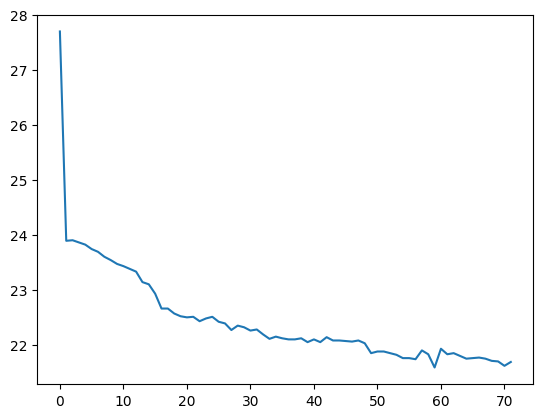

In [2]:
import re
import pandas as pd
file = r"C:\Users\lh\Desktop\temp\20250505_lob_trade_dagger_20250507.log" 
# file = r"C:\Users\lh\Desktop\temp\20250505_lob_trade_dagger_2_20250507.log" 

pattern = r"(\d+\.\d+)\s*GB"  # 使用捕获组 `(\d+\.\d+)` 提取数字部分
ava_mem = []
with open(file, 'r',encoding='utf-8')as f:
    for line in f:
        line = line.strip()  # 去除首尾空白字符（如换行符）
        if '[train 0] 系统可用内存' in line:
            match = re.search(pattern, line)
            memory = match.group(1)  # 提取第一个捕获组（即数字部分）
            ava_mem.append(float(memory))

ava_mem = pd.Series(ava_mem)
print(f'min: {ava_mem.min():.3f}')
print(ava_mem[-5:])
ava_mem.plot()

# 解压bc压缩数据

In [15]:
from py_ext.lzma import decompress
import os

# 解压文件
local_folder = r'D:\L2_DATA_T0_ETF\train_data\RAW\BC_train_data\bc_train_data_21'
# local_folder = r'D:\L2_DATA_T0_ETF\train_data\RAW\BC_train_data\temp'
files = os.listdir(local_folder)
for file in files:
    decompress(os.path.join(local_folder, file))

# 性能分析
### cProfile 文件可视化

In [5]:
# 生成性能分析文件
!python -m cProfile -o "C:\Users\lh\Desktop\temp\profile.prof" your_script.py

Traceback (most recent call last):
  File "d:\programs\miniconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\programs\miniconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "d:\programs\miniconda3\lib\cProfile.py", line 191, in <module>
    main()
  File "d:\programs\miniconda3\lib\cProfile.py", line 171, in main
    with io.open_code(progname) as fp:
FileNotFoundError: [Errno 2] No such file or directory: 'your_script.py'


In [ ]:
# 启动可视化界面
!python -m snakeviz "C:\Users\lh\Desktop\temp\profile.prof"

### py-spy

In [ ]:
py-spy record -o "C:\Users\lh\Desktop\temp\profile.json" -f speedscope -- python "d:/code/dl_helper/dl_helper/rl/rl_env/lob_trade/lob_expert.py"
py-spy record -o "C:\Users\lh\Desktop\temp\profile.json" -f speedscope -- python lob_expert.py

# 寻找最大学习率

In [13]:
import pandas as pd
file = r"C:\Users\lh\Downloads\progress_all.csv"
file = r"D:\code\dl_helper\20250419_lob_trade_bc_2\progress.csv"
df_progress = pd.read_csv(file)
df_progress.head()

,batch_size,bc/epoch,bc/entropy,bc/ent_loss,bc/prob_true_act,bc/batch,bc/neglogp,bc/l2_norm,bc/l2_loss,bc/samples_so_far,bc/lr,bc/loss
0,32,0,0.693126,-0.000693,0.500669,0,0.691829,1235.378784,0.0,32,1.010000e-07,0.691136
1,32,0,0.693137,-0.000693,0.500352,1,0.692454,1235.378784,0.0,64,1.020100e-07,0.691761
2,32,0,0.693141,-0.000693,0.499997,2,0.693159,1235.378784,0.0,96,1.030301e-07,0.692466
3,32,0,0.693130,-0.000693,0.499667,3,0.693830,1235.378784,0.0,128,1.040604e-07,0.693137
4,32,0,0.693131,-0.000693,0.500141,4,0.692882,1235.378784,0.0,160,1.051010e-07,0.692189


<Axes: >

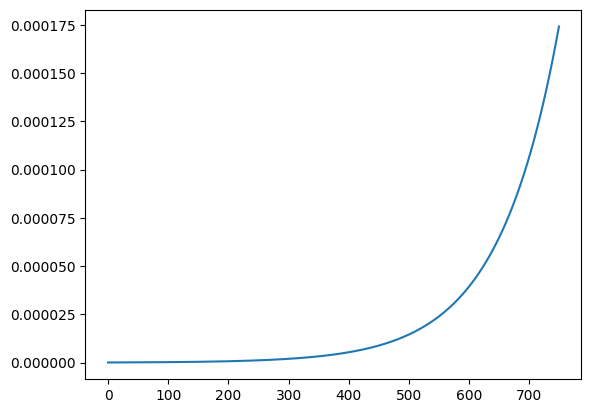

In [50]:
df_progress['bc/lr'].iloc[:750].plot()

<Axes: >

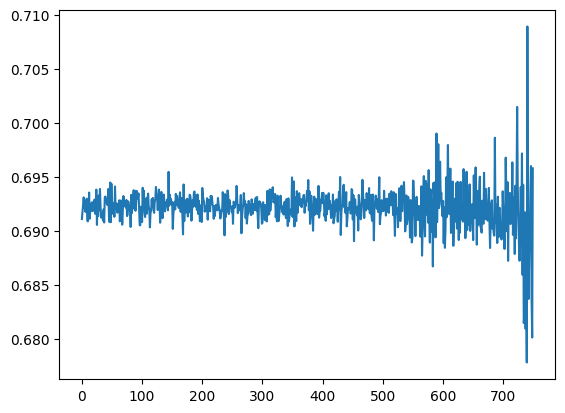

In [51]:
df_progress['bc/loss'].iloc[:750].plot()

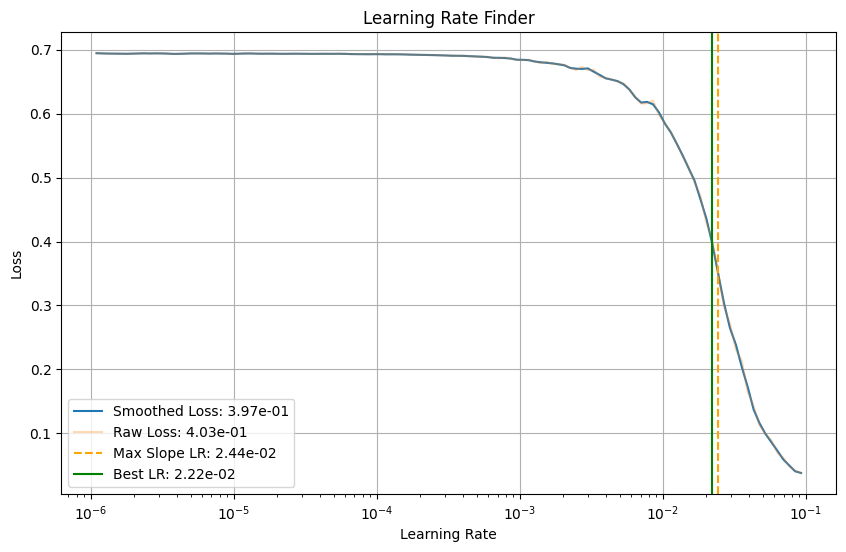

np.float64(0.0221938139794073)

In [3]:
from dl_helper.rl.rl_utils import find_best_lr
data = df_progress.iloc[:120]
find_best_lr(data['bc/lr'], data['bc/loss'])

# 读取数据测试

In [10]:
import pickle
import pandas as pd
import numpy as np

file = r"C:\Users\lh\Downloads\val_data.pkl"
all_preds, all_true, total_loss, num_samples = pickle.load(open(file, 'rb'))
total_loss, num_samples

(7823.6707333773375, 101687)

In [25]:
from dl_helper.rl.rl_env.lob_trade.lob_env import LOB_trade_env
import numpy as np

debug_obs_date = np.float32(12448.0)
debug_obs_time = np.float32(0.65676767)
init_pos = 1

code = '513050'
env = LOB_trade_env({
        'data_type': 'train',# 训练/测试
        'his_len': 100,# 每个样本的 历史数据长度
        'need_cols': [item for i in range(5) for item in [f'BASE卖{i+1}价', f'BASE卖{i+1}量', f'BASE买{i+1}价', f'BASE买{i+1}量']],
        'use_symbols': [code],

        'train_folder': r'C:\Users\lh\Desktop\temp\lob_env',
        'train_title': 'test',
    },
    debug_obs_date=debug_obs_date,
    debug_obs_time=debug_obs_time,
    debug_init_pos = init_pos,
    dump_bid_ask_accnet=True,
)

obs, info = env.reset()

2025-04-23 02:36:43 | lob_env.py:__init__:1494 - [958386128] init logger: C:\Users\lh\Desktop\temp\lob_env\logs\test_20250423.log
2025-04-23 02:36:43 | lob_env.py:__init__:121 - [train] debug_date: ['20240131']
2025-04-23 02:36:43 | lob_env.py:__init__:125 - [train] debug_time: 13004
2025-04-23 02:36:43 | lob_env.py:__init__:189 - [train] data_producer init done
2025-04-23 02:36:43 | lob_env.py:__init__:1553 - [958386128][train] init env done
2025-04-23 02:36:43 | lob_env.py:reset:1864 - [958386128][train] reset
2025-04-23 02:36:43 | lob_env.py:_pre_files:253 - [train] prepare files: ['20240131.pkl']
2025-04-23 02:36:43 | lob_env.py:_load_data:271 - [train] load date file: 20240131.pkl
2025-04-23 02:36:43 | lob_env.py:_load_data:355 - [train] init idxs: [[np.int64(2160), np.int64(4585), 0]]
2025-04-23 02:36:43 | lob_env.py:reset:1885 - acc reset: 1


In [41]:
traj.obs[0][:5], obs[:5]

(array([-2.7533922 ,  0.30286825, -2.7520857 , -0.16164644, -2.7533922 ],
       dtype=float32),
 array([-2.7533922 ,  0.30286825, -2.7520857 , -0.16150232, -2.7533922 ],
       dtype=float32))

In [29]:
traj.obs[0].shape, obs.shape

((2004,), (2004,))

In [42]:
np.array_equal(traj.obs[0][-5:], obs[-5:])

True

In [6]:
from dl_helper.rl.rl_env.lob_trade.lob_expert import LobExpert_file

expert = LobExpert_file(pre_cache=True)

2025-04-23 14:00:23.792 | INFO     | py_ext.tool:log:843 - lob_expert.py:__init__:59 - cache all expert data
2025-04-23 14:00:52.314 | INFO     | py_ext.tool:log:843 - lob_expert.py:cache_all:87 - cache_all done, cache_data: 327 dates


In [23]:
traj.obs[132][-2], traj.obs[133][-2], traj.obs[134][-2]

(np.float32(0.0), np.float32(0.0), np.float32(1.0))

In [22]:
traj.acts[132], traj.acts[133], traj.acts[134]

(np.float64(1.0), np.float64(0.0), np.float64(0.0))

In [21]:
expert.get_action(traj.obs[133]), expert.get_action(traj.obs[134])

(np.float64(1.0), 0)

<Axes: >

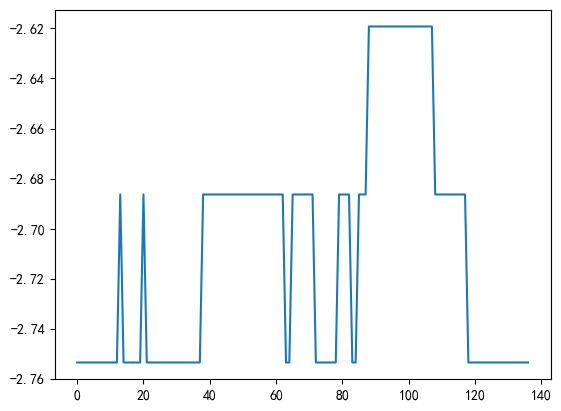

In [48]:
pd.Series(traj.obs[:, 0]).plot()

In [50]:
import pandas as pd
from dl_helper.rl.rl_env.lob_trade.lob_const import MAX_SEC_BEFORE_CLOSE
df = pd.DataFrame({
    'traj_before_market_close_sec': traj.obs[:-1, -4] * MAX_SEC_BEFORE_CLOSE,
    'traj_pos': traj.obs[:-1, -2],
    'traj_act': traj.acts,
    'act': [expert.get_action(traj.obs[i]) for i in range(len(traj.acts))],
})
df.head()
df.to_csv(r'C:\Users\lh\Desktop\temp\traj.csv', index=False)

In [31]:
_obs, _next_obs, _acts, _infos, _rews = balance_rollout(traj)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [33]:
from dl_helper.rl.rl_env.lob_trade.lob_const import MEAN_SEC_BEFORE_CLOSE, STD_SEC_BEFORE_CLOSE, MAX_SEC_BEFORE_CLOSE
from dl_helper.rl.rl_utils import date2days, days2date

obs_date = np.float32(12448.0)
obs_time = np.float32(0.65676767)
init_pos = 1

date = days2date(int(obs_date))
time = int(obs_time * MAX_SEC_BEFORE_CLOSE)
date, time

('20240131', 13004)

In [36]:
acc_status = None
debug_init_pos = None
print(acc_status or debug_init_pos)

1


In [62]:
a = [1,2,3,4,5]
b = []
np.random.choice(a, len(b), replace=False)

array([], dtype=int64)

In [4]:
from dl_helper.rl.custom_imitation_module.rollout import flatten_trajectories

f = rollouts_filter()
f.add_rollouts(rollouts[:3])
print(f'样本长度: {len(f)}')
transitions1 = f.flatten_trajectories()
len(transitions1)

样本长度: 8


8

In [5]:
f.add_rollouts(rollouts[3:])
print(f'样本长度: {len(f)}')
transitions2 = f.flatten_trajectories()
len(transitions2)

样本长度: 27


27

In [15]:
import torch
import torch.nn as nn
from accelerate import Accelerator

# 定义一个简单的模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(10, 5)

    def forward(self, x):
        return self.linear(x)

# 初始化 Accelerator
accelerator = Accelerator()

# 创建模型实例
model = SimpleModel()

# 使用 accelerator 包装模型（例如进行分布式训练准备等）
model = accelerator.prepare(model)

# 定义保存路径
save_directory = r"C:\Users\lh\AppData\Local\Temp"

# 保存模型
accelerator.save_model(model, save_directory)

print(f"模型已保存到: {save_directory}")

模型已保存到: C:\Users\lh\AppData\Local\Temp


In [16]:
for name, param in model.named_parameters():
    print(f"参数名称: {name}")
    print(f"形状: {param.shape}")
    print(f"参数数组:\n{param.data}\n")  # .data 可以去掉梯度信息，只看数值

参数名称: linear.weight
形状: torch.Size([5, 10])
参数数组:
tensor([[-0.1692,  0.2634, -0.0119,  0.0594,  0.1869, -0.2154, -0.0707, -0.0629,
          0.2025,  0.0373],
        [-0.0122, -0.3070, -0.2192, -0.1014, -0.1232,  0.2321,  0.0244,  0.0889,
         -0.0517,  0.1914],
        [-0.1084,  0.0603,  0.2106,  0.2907, -0.2515,  0.1826,  0.0022, -0.0334,
          0.1355, -0.2860],
        [-0.2713,  0.2202,  0.0163, -0.0328,  0.0009, -0.3029,  0.0437,  0.0474,
          0.0490,  0.2236],
        [-0.2497,  0.2830,  0.2816, -0.2233,  0.0338, -0.2304, -0.2827,  0.0455,
          0.2351,  0.1232]], device='cuda:0')

参数名称: linear.bias
形状: torch.Size([5])
参数数组:
tensor([-0.0439, -0.1881,  0.1267, -0.0751, -0.0531], device='cuda:0')



In [ ]:
from safetensors.torch import load_file
model = SimpleModel()
model.load_state_dict(load_file(r"C:\Users\lh\AppData\Local\Temp\model.safetensors"))

# 训练机器数量安排

In [6]:
vars = []
classify_idx = 0
for predict_n in [3, 5, 10, 15, 30, 60, 100]:
    for label in ['paper', 'paper_pct', 'label_1', 'label_1_pct']:
        if label == 'label_1':
            # 同一个训练使用 5 个随机种子，最终取均值
            for seed in range(5):
                vars.append((predict_n, classify_idx, seed))
        classify_idx+=1

print(f'共 {len(vars)} 个实验') 
print(f'需要 {len(vars) / 2} 个账户')

共 35 个实验
需要 17.5 个账户


# TEMP

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime

ts = pd.Series([1712016000])
dt = pd.to_datetime(ts, unit='s', origin='1970-01-01 08:00:00')
print(dt)

datetime.fromtimestamp(1712016000).strftime('%Y-%m-%d %H:%M:%S.%f')

0   2024-04-02 08:00:00
dtype: datetime64[ns]


'2024-04-02 08:00:00.000000'

In [7]:
none_pos_df = df.loc[df['has_pos'] == 0]
none_pos_df['target'].value_counts()

target
1.0    44721
0.0      322
Name: count, dtype: int64

In [9]:
none_pos_df[none_pos_df['target'] == 0]

,timestamp,target,has_pos,0,1
11154,1725948188,0.0,0,9.999992e-01,8.829725e-07
11156,1725948185,0.0,0,9.842923e-01,1.570775e-02
11158,1725948182,0.0,0,1.765757e-05,9.999824e-01
11160,1725948179,0.0,0,6.160673e-11,1.000000e+00
11162,1725948176,0.0,0,3.675997e-01,6.324003e-01
...,...,...,...,...,...
87274,1727145940,0.0,0,9.998832e-01,1.168343e-04
87630,1727145406,0.0,0,9.999516e-01,4.841568e-05
87632,1727145403,0.0,0,9.999918e-01,8.228387e-06
87634,1727145400,0.0,0,9.650101e-02,9.034990e-01


In [8]:
has_pos_df = df.loc[df['has_pos'] == 1]
has_pos_df['target'].value_counts()

target
0.0    44434
1.0      609
Name: count, dtype: int64

In [21]:
rank = 2

In [22]:
max_handle_date_num = 89
begin = rank*max_handle_date_num
wait_dates = wait_dates_all[max(begin-1, 0): begin+max_handle_date_num]
wait_dates[0:2], wait_dates[-2:]

(['20240712', '20240715'], ['20241122', '20241125'])

In [ ]:
# 0 标准化日期: 20231016 - 20240301
# 1 标准化日期: 20240305 - 20240712 | miss 20240304
# 2 标准化日期: 20240716 - 20241125 | miss 20240715

In [ ]:
# 0 标准化日期: 20231016 - 20240301 | 
# 1 标准化日期: 20240304 - 20240712 | miss 20240304
# 2 标准化日期: 20240715 - 20241125 | miss 20240715